# Weather models : 2D parameters

The aim of this notebook is to indicate how to read the 2D data from weather models.
There are 2 weather models:
* a fine-mesh french weather model called 'AROME' (spatial resolution of 0.025°)
* a large-mesh french weather model called 'ARPEGE' (spatial resolution of 0.1°)

Per model and day, you have the model run of 00h with range forecasts from 00h to 24h. The time step is 1h.

Here are the different weather parameters:

* at 2m: temperature (in K), dew point temperature** (in K) and relative humidity (in %)
* at 10m: wind speed (in m.s<sup>-1</sup>), wind direction (in degrees), U and V wind components*** (in m.s<sup>-1</sup>)
* at the sea level: mean sea level pressure (in Pa)
* at the ground level: total precipitation (in kg m<sup>-2</sup> which is equivalent to mm) **since the beginning of the model run**

For more information about data, cf [documentation](https://meteofrance.github.io/meteonet/english/data/weather-models/).

** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)

*** : horizontal wind speed components, U : from west to east and V : from south to north. 

# Note

<font size="4.5">To use <span style="color:blue">**Cartopy**</span>, a library to plot data with basemaps (see cells below), it is necessary to <span style="color:red">activate the internet connection</span> of that notebook (in edit mode, you can find on the right column, in the *Settings* section, a row entitled *Internet*, put the slider bar on **on**).  </font>

<font size="4.5">If it does not still work, check you use the latest environment (in the *Settings* section, click on **Preferences**).</font>

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [21]:
model = 'arome'  #weather model (arome or arpege)
param = "t2m"   #parameter name in the file (cf cells below to know the parameter names -> exploration of metadata)
file_index_day = 119 # Day index example 

In [22]:
fname = "./../data/Test/Test/X_forecast/2D_%s_%s.nc" %(model,file_index_day)
data = xr.open_dataset(fname)

In [23]:
data

<xarray.Dataset>
Dimensions:    (latitude: 227, longitude: 315, Id: 25)
Coordinates:
    time       int64 ...
  * latitude   (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude  (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * Id         (Id) object '119_0' '119_1' '119_2' ... '119_23' '119_24'
Data variables:
    ws         (Id, latitude, longitude) float32 ...
    p3031      (Id, latitude, longitude) float32 ...
    u10        (Id, latitude, longitude) float32 ...
    v10        (Id, latitude, longitude) float32 ...
    t2m        (Id, latitude, longitude) float32 ...
    d2m        (Id, latitude, longitude) float32 ...
    r          (Id, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse

In [5]:
coord = 'longitude'
data[coord]

<xarray.DataArray 'longitude' (longitude: 315)>
array([-5.842, -5.817, -5.792, ...,  1.958,  1.983,  2.008], dtype=float32)
Coordinates:
    time       int64 1
  * longitude  (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008

In [6]:
data[coord].values[0:10]

array([-5.842, -5.817, -5.792, -5.767, -5.742, -5.717, -5.692, -5.667,
       -5.642, -5.617], dtype=float32)

In [17]:
month = data['time']
#month.values     #get the values
month

<xarray.DataArray 'time' ()>
array(1)
Coordinates:
    time     int64 1

In [18]:
ids = data['Id']    # Id = day index + '_' + hour
ids

<xarray.DataArray 'Id' (Id: 25)>
array(['119_0', '119_1', '119_2', '119_3', '119_4', '119_5', '119_6', '119_7',
       '119_8', '119_9', '119_10', '119_11', '119_12', '119_13', '119_14',
       '119_15', '119_16', '119_17', '119_18', '119_19', '119_20', '119_21',
       '119_22', '119_23', '119_24'], dtype=object)
Coordinates:
    time     int64 1
  * Id       (Id) object '119_0' '119_1' '119_2' ... '119_22' '119_23' '119_24'

In [19]:
d = data[param]     #param : parameter name defined at the beginning of the Notebook 
d_vals=d.values     #get the values
###examples to get the information from attributes
#d.units                      #unit
#d.long_name                      #long name
d

<xarray.DataArray 't2m' (Id: 25, latitude: 227, longitude: 315)>
array([[[281.04376, 281.06564, ..., 279.22723, 279.28015],
        [281.07422, 281.09164, ..., 279.31003, 279.34848],
        ...,
        [284.8882 , 284.89145, ..., 280.18207, 279.71484],
        [284.8814 , 284.90475, ..., 279.59833, 279.26242]],

       [[280.96005, 280.96774, ..., 278.94897, 278.9877 ],
        [280.9994 , 280.9982 , ..., 279.01047, 279.06046],
        ...,
        [284.83408, 284.85864, ..., 279.90292, 279.53595],
        [284.83557, 284.87195, ..., 279.63263, 279.39874]],

       ...,

       [[282.88983, 282.90552, ..., 280.00522, 280.05286],
        [282.90137, 282.91556, ..., 280.06024, 280.09393],
        ...,
        [284.66553, 284.6679 , ..., 278.65887, 278.73962],
        [284.67856, 284.6889 , ..., 278.5146 , 278.5678 ]],

       [[282.8576 , 282.86145, ..., 280.46445, 280.50113],
        [282.87326, 282.87238, ..., 280.50024, 280.5159 ],
        ...,
        [284.63184, 284.63596, ..., 278.4714 , 278.4646 ],
        [284.65756, 284.66437, ..., 278.30374, 278.33597]]], dtype=float32)
Coordinates:
    time       int64 1
  * latitude   (latitude) float32 51.9 51.87 51.85 51.82 ... 46.3 46.27 46.25
  * longitude  (longitude) float32 -5.842 -5.817 -5.792 ... 1.958 1.983 2.008
  * Id         (Id) object '119_0' '119_1' '119_2' ... '119_23' '119_24'
Attributes:
    long_name:  2 metre temperature
    units:      K

The structure of the parameter (3 dimensions):
* number of steps or range forecasts
* number of points in latitude
* number of points in longitude  

In [10]:
d_vals.shape

(25, 227, 315)

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [12]:
id_value = '119_23'

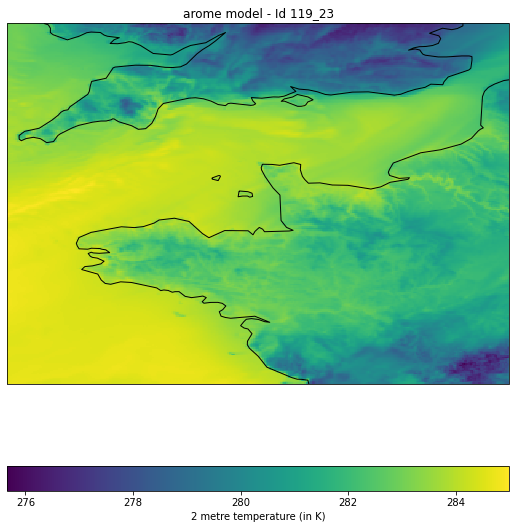

In [13]:
# Coordinates of studied area boundaries (in °N and °E)
lllat = 46.25  #lower left latitude
urlat = 51.896  #upper right latitude
lllon = -5.842  #lower left longitude
urlon = 2  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig=plt.figure(figsize=(9,10))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

#plot the data and the background map (coastlines and borders)
img = ax.imshow(data.sel(Id=id_value)[param], interpolation='none', origin='upper', extent=extent)
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))


plt.colorbar(img, orientation= 'horizontal').set_label(d.long_name+ ' (in '+d.units+ ')')
plt.title(model +" model - Id "+ id_value)
plt.show()